In [1]:
%pylab inline
%config InlineBackend.figure_format = 'retina'
from ipywidgets import interact

Populating the interactive namespace from numpy and matplotlib


# Predator Prey
$$
\begin{align*}
 \dot{x} &= ax - bxy,\quad x(0) = x_0\\
 \dot{y} &= cxy - dy,\quad y(0) = y_0
\end{align*}
$$
The transition diagram for an equivalent birth-death process is
$$
\begin{gather*}
N-1
{{ \atop\longrightarrow}\atop{\longleftarrow\atop \epsilon b NM}} 
N
 {{a N \atop\longrightarrow}\atop{\longleftarrow\atop}} 
N+1 \\
M - 1
{{\atop\longrightarrow}\atop{\longleftarrow\atop  dM}} 
M
{{\epsilon c NM \atop\longrightarrow}\atop{\longleftarrow\atop }} 
M+1
\end{gather*}
$$

(xhat, yhat) =  (1.1874999999999998, 4.2)


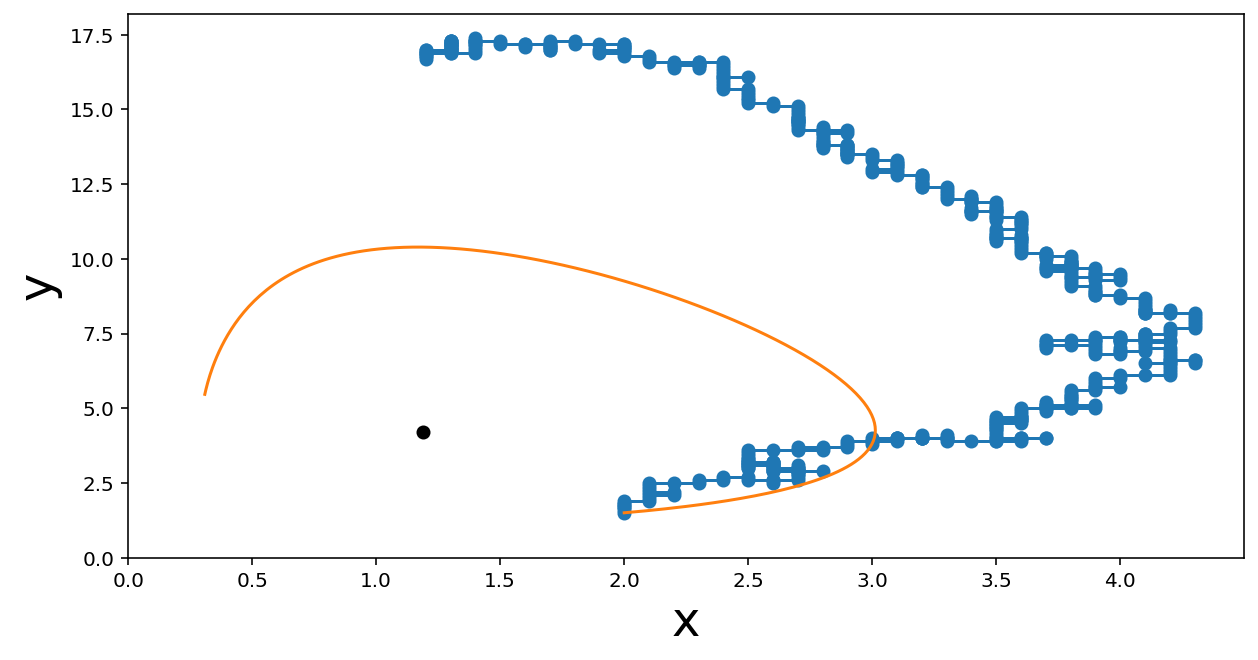

In [4]:
epsilon = 0.1 # TRY CHANGING THIS VALUE
a = 2.1
b = 0.5
c = 1.6
d = 1.9
xhat = d/c
yhat = a/b
print('(xhat, yhat) = ', (xhat, yhat))
x0 = 2.
y0 = 1.5
n0 = int(x0/epsilon)
m0 = int(y0/epsilon)
Nsteps = 500
def stochastic_pp(a, b, c, d, epsilon, n0, m0, Nsteps):
    N = zeros(Nsteps)
    N[0] = n0
    M = zeros(Nsteps)
    M[0] = m0
    T = zeros(Nsteps)
    T[0] = 0
    for j in arange(1, Nsteps):
        n = N[j-1]
        m = M[j-1]
        #### There are 4 'arrows' leaving a given state: N-birth, N-death, M-birth, M-death
        combined_rate = a*n + epsilon*b*n*m + epsilon*c*n*m + d*m
        u = rand(1)
        tau = -log(u)/combined_rate
        T[j] = T[j-1] + tau # update time array with new time value
        ## now we make a random variable to decide if birth or death occurs
        ## the order in the vector is N-birth, N-death, M-birth, M-death
        probability_vector = array([a*n, epsilon*b*n*m, epsilon*c*n*m, d*m])/combined_rate
        cummulative_probability_vector = cumsum(probability_vector)
        u2 = rand(1)
        if u2 < cummulative_probability_vector[0]:
            N[j] = N[j-1] + 1 
            M[j] = M[j-1]
        elif u2 < cummulative_probability_vector[1]:
            N[j] = N[j-1] - 1
            M[j] = M[j-1]
        elif u2 < cummulative_probability_vector[2]:
            N[j] = N[j-1]
            M[j] = M[j-1] + 1
        else:
            N[j] = N[j-1]
            M[j] = M[j-1] - 1
        ### check for extinction    
        if N[j] == 0 or M[j] == 0: 
            return T[:j+1], N[:j+1], M[:j+1] # return the solution so far
    return T, N, M
def pp_ode(a, b, c, d, x0, y0, Tmax): # change `Nsteps` to alter
    ### Euler's method parameters
    Delta_t = 0.01 # The size of the time step
    Nsteps = int(Tmax/Delta_t)
    x = zeros(Nsteps) # an array of zeros to store the solution in
    y = zeros(Nsteps)
    x[0] = x0 # store the initial condition
    y[0] = y0
    def f_pp(x, y): # the ligistic growth RHS function
        dxdt = a*x - b*x*y
        dydt = c*x*y - d*y
        return array([dxdt, dydt])
    ####### The simulation loop #########
    for n in arange(1, Nsteps): # loop from n=1 up to n=Nsteps-1
        dx, dy = f_pp(x[n-1], y[n-1])
        x[n] = x[n-1] + Delta_t*dx
        y[n] = y[n-1] + Delta_t*dy
    t = Delta_t*arange(Nsteps)
    return t, x, y

figure(1, [10, 5])

T, N, M = stochastic_pp(a, b, c, d, epsilon, n0, m0, Nsteps)

Tode, Xode, Yode = pp_ode(a, b, c, d, x0, y0, 2*T[-1])

plot(epsilon*N, epsilon*M, '-o')
plot(Xode, Yode)
plot(xhat, yhat, 'ok')
xlim(0, None)
ylim(0, None)
xlabel('x', fontsize=24)
ylabel('y', fontsize=24);

# Gene expression system: mutual repressors model: phase plane
\begin{align*}
    \dot{x} &= f(x, y), \\
    \dot{y} &= f(y, x),
              %% b = 0.15
\end{align*}
where
$$
f(x, y) = \frac{b + x^2}{b + x^2 + y^2} - x.
$$
The parameter $b>0$ represents the base rate of expression.


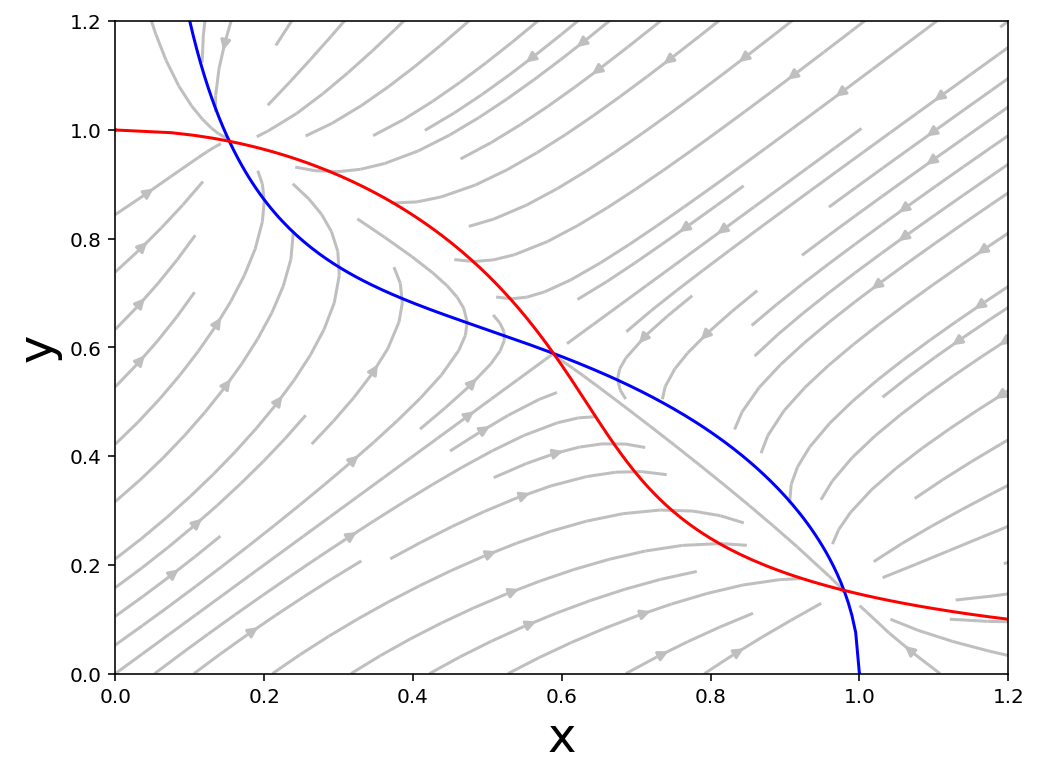

In [6]:
b = 0.15
x = linspace(0.01, 1, 200)
y1 = sqrt((b + x**2)*(1-x)/x)
y2 = -sqrt((b + x**2)*(1-x)/x)

xv = linspace(0, 1.5, 50)
X, Y = meshgrid(xv, xv)
U = (b + X**2)/(b + X**2 + Y**2) - X
V = (b + Y**2)/(b + Y**2 + X**2) - Y
# U /= sqrt(U**2 + V**2)
# V /= sqrt(U**2 + V**2)

figure(1, [8, 6])

# quiver(X, Y, U, V, color='0.5')
streamplot(X, Y, U, V, color='0.75')

plot(x, y1, 'b')
plot(y1, x, 'r')
plot(x, y2, 'b')
plot(y2, x, 'r')
xlim(0, 1.2)
ylim(0, 1.2)
xlabel('x', fontsize=24)
ylabel('y', fontsize=24);